# Лабораторная работа №6
-----------------------
**Кластеризация (DBSCAN, OPTICS)**

----------------------- 

## Цель:
Ознакомиться с методами кластеризации модуля Sklearn

## Выполнение

### imports

In [2]:
import pandas as pd
import numpy  as np

from sklearn.metrics.pairwise import pairwise_distances_argmin
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.decomposition import PCA
from sklearn import preprocessing

import matplotlib.pyplot as plt

### Загрузка данных

In [3]:
data = pd.read_csv('CC_GENERAL.csv').iloc[:,1:].dropna()
data.round(3).head()

,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,40.901,0.818,95.40,0.00,95.40,0.000,0.167,0.000,0.083,0.00,0,2,1000.0,201.802,139.510,0.000,12
1,3202.467,0.909,0.00,0.00,0.00,6442.945,0.000,0.000,0.000,0.25,4,0,7000.0,4103.033,1072.340,0.222,12
2,2495.149,1.000,773.17,773.17,0.00,0.000,1.000,1.000,0.000,0.00,0,12,7500.0,622.067,627.285,0.000,12
4,817.714,1.000,16.00,16.00,0.00,0.000,0.083,0.083,0.000,0.00,0,1,1200.0,678.335,244.791,0.000,12
5,1809.829,1.000,1333.28,0.00,1333.28,0.000,0.667,0.000,0.583,0.00,0,8,1800.0,1400.058,2407.246,0.000,12


### DBSCAN

In [5]:
def plot_kmeans(k_means, data, title):
    k_means_cluster_centers = k_means.cluster_centers_
    k_means_labels = pairwise_distances_argmin(data, k_means_cluster_centers)

    reduced_data = PCA(n_components=2).fit_transform(data)
    np_data = data.to_numpy()

    fig, axs = plt.subplots(1, 1, figsize=(10, 10))
    fig.suptitle(title)
    colors = ['#4EACC5', '#FF9C34', '#4E9A06']

    for i in range(3):
        my_members = k_means_labels == i
        cluster_center = k_means_cluster_centers[i]

        axs.plot(
            reduced_data[my_members, 0],
            reduced_data[my_members, 1], linestyle="None",
            markerfacecolor=colors[i],
            markeredgecolor="w",
            marker='o', markersize=4
        )

    plt.show()

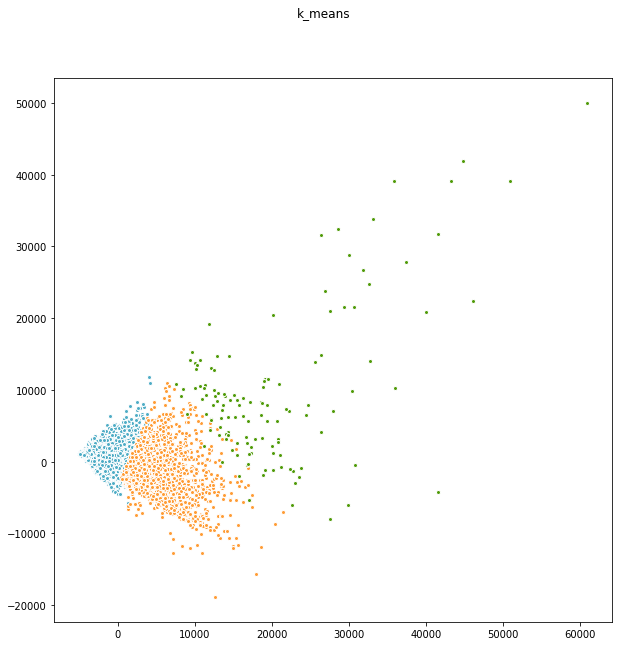

6298
2210
128


In [6]:
k_means = KMeans(init='k-means++', n_clusters=3, n_init=15)
k_means.fit(data)

plot_kmeans(k_means, data, "k_means")

print(len(k_means.labels_[k_means.labels_ == 0]))
print(len(k_means.labels_[k_means.labels_ == 1]))
print(len(k_means.labels_[k_means.labels_ == 2]))

In [4]:
data = np.array(data, dtype='float')
min_max_scaler = preprocessing.StandardScaler()
scaled_data = min_max_scaler.fit_transform(data)


In [15]:
clustering = DBSCAN().fit(scaled_data)
print("Cluster labels:", set(clustering.labels_))
print("Total clusters:", len(set(clustering.labels_)) - 1)
print("Non-clustered data:", list(clustering.labels_).count(-1) / len(list(clustering.labels_)))

Cluster labels: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, -1}
Total clusters: 36
Non-clustered data: 0.7512737378415933


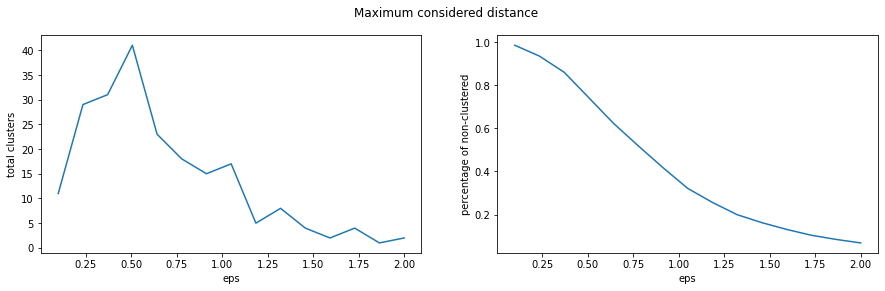

In [21]:
total_clusters_eps, non_clustered_eps = [], []
eps_axis = np.linspace(0.1, 2, 15)

for eps in eps_axis:
    dbscan = DBSCAN(eps=eps).fit(scaled_data)
    total_clusters_eps.append(len(set(dbscan.labels_)) - 1)
    non_clustered_eps.append(list(dbscan.labels_).count(-1) / len(list(dbscan.labels_)))

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

fig.suptitle("Maximum considered distance")

axs[0].plot(eps_axis, total_clusters_eps)
axs[0].set_xlabel("eps")
axs[0].set_ylabel("total clusters")

axs[1].plot(eps_axis, non_clustered_eps)
axs[1].set_xlabel("eps")
axs[1].set_ylabel("percentage of non-clustered")

plt.show()


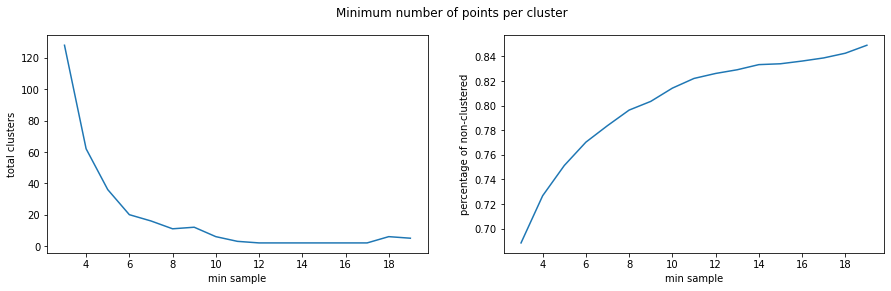

In [25]:
total_clusters_eps, non_clustered_eps = [], []
min_samples_axs = np.arange(3, 20, 1)

for min_samples in min_samples_axs:
    dbscan = DBSCAN(min_samples=min_samples).fit(scaled_data)
    total_clusters_eps.append(len(set(dbscan.labels_)) - 1)
    non_clustered_eps.append(list(dbscan.labels_).count(-1) / len(list(dbscan.labels_)))

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

fig.suptitle("Minimum number of points per cluster")

axs[0].plot(min_samples_axs, total_clusters_eps)
axs[0].set_xlabel("min sample")
axs[0].set_ylabel("total clusters")

axs[1].plot(min_samples_axs, non_clustered_eps)
axs[1].set_xlabel("min sample")
axs[1].set_ylabel("percentage of non-clustered")

plt.show()


In [30]:
# suitable_parameters = []

# for min_samples in np.arange(2, 30, 1):
#     for eps in np.linspace(0.1, 3.0, 30):
#         dbscan = DBSCAN(eps=eps, min_samples=min_samples).fit(scaled_data)
#         total_clusters = len(set(dbscan.labels_)) - 1
#         non_clustered = list(dbscan.labels_).count(-1) / len(list(dbscan.labels_))

#         if 5 <= total_clusters <= 7 and non_clustered <= 0.12:
#             suitable_parameters.append({ "min_samples": min_samples, "eps": eps, "non-clustered": non_clustered, "clusters": total_clusters })

# pd.DataFrame(suitable_parameters)

,min_samples,eps,non-clustered,clusters
0,3,2.0,0.062876,6
1,3,2.6,0.030917,5
2,3,2.7,0.027096,5
3,3,2.9,0.022233,5
4,3,3.0,0.019569,5
5,4,1.7,0.102478,5


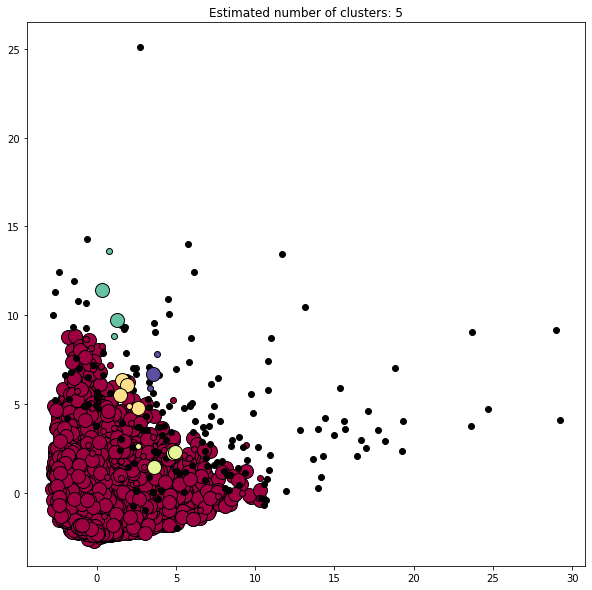

In [13]:
suitable = DBSCAN(eps=3, min_samples=3).fit(scaled_data)
reduced_data = PCA(n_components=2).fit_transform(scaled_data)

core_samples_mask = np.zeros_like(suitable.labels_, dtype=bool)
core_samples_mask[suitable.core_sample_indices_] = True

labels = suitable.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

unique_labels = list(set(labels))
unique_labels.sort(key=lambda k: 1/list(labels).count(k))

colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

plt.figure(figsize=(10, 10))

for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0,0,0,1]

    class_member_mask = labels == k
    xy = reduced_data[class_member_mask & core_samples_mask]

    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    ),

    xy = reduced_data[class_member_mask & ~core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=6
    ),

plt.title("Estimated number of clusters: %d" % n_clusters_)
plt.show()

### OPTICS

|Параметр                                                     |Описание   |
|-------------------------------------------------------------|-----------|
|max_eps: float = $\infty$                                    | Максимальное расстояние между наблюдениями, чтобы они считались соседними (радиус окрестности наблюдения)|
|min_samples: int > 1 or float(0, 1) = 5                      | Количество наблюдений вокруг точки, чтобы считать ее базовой|
|metric: [string][1] or callable = "minkowski"                | Метрика вычисления расстояния|
|p: int = 2                                                   | Параметр для метрики Минковского|
|metric_params: dict = None                                   | Набор параметров для метрики, заданной функцией|
|cluster_method: ("xi", "dbscan") = "xi"                      | Метод извлечения кластеров |
|eps: float = None                                            | Максимальное расстояние между наблюдениями, чтобы они считались соседними (радиус окрестности наблюдения). Используется при `cluster_method='dbscan'`|
|xi: float(0,1) = 0.5                                         | Определяет минимальную крутизну на графике достижимости, который составляет границу кластера. Используется при `cluster_method='xi'`|
|predecessor_correction: bool = True                          | Коррекция кластеров в соответствии с предшественниками, рассчитанными _OPTICS_. Используется при `cluster_method='xi'`|
|min_cluster_size: int > 1 or float(0, 1) = None              | Минимальное количество выборок в кластере _OPTICS_, выраженное в виде абсолютного числа доли от количества выборок. Используется при `cluster_method='xi'`|
|algorithm: (‘auto’, ‘ball_tree’, ‘kd_tree’, ‘brute’) = "auto"| Алгоритм поиска ближайших соседей |
|leaf_size: int = 30                                          | Размер листьев дерева алгоритмов _BallTree_ и _KDTree_.|
|memory: [string][2] = None                                   | Используется для кеширования дерева вычислений. Являясь строкой, опередляет путь кеширования. |
|n_jobs: int = None                                           | Количество параллельных рутин, в которых вычисляются ближайшие соседи. -1 означает использование всех процессоров.|


[1:]
* from scikit-learn: \[‘cityblock’, ‘cosine’, ‘euclidean’, ‘l1’, ‘l2’, ‘manhattan’\]
* from scipy.spatial.distance: \[‘braycurtis’, ‘canberra’, ‘chebyshev’, ‘correlation’, ‘dice’, ‘hamming’, ‘jaccard’, ‘kulsinski’, ‘mahalanobis’, ‘minkowski’, ‘rogerstanimoto’, ‘russellrao’, ‘seuclidean’, ‘sokalmichener’, ‘sokalsneath’, ‘sqeuclidean’, ‘yule’\]

[2:] str or object with the joblib.Memory interface


In [54]:
optics = OPTICS(max_eps = 3.0).fit(scaled_data)

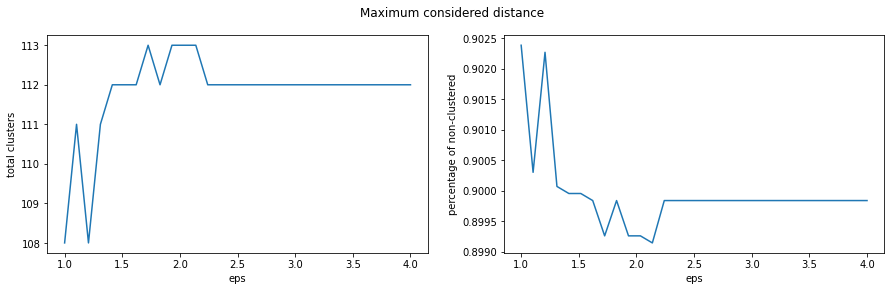

In [55]:
total_clusters_eps, non_clustered_eps = [], []
eps_axis = np.linspace(1, 4, 30)

for eps in eps_axis:
    optics = OPTICS(max_eps=eps).fit(scaled_data)
    total_clusters_eps.append(len(set(optics.labels_)) - 1)
    non_clustered_eps.append(list(optics.labels_).count(-1) / len(list(optics.labels_)))

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

fig.suptitle("Maximum considered distance")

axs[0].plot(eps_axis, total_clusters_eps)
axs[0].set_xlabel("eps")
axs[0].set_ylabel("total clusters")

axs[1].plot(eps_axis, non_clustered_eps)
axs[1].set_xlabel("eps")
axs[1].set_ylabel("percentage of non-clustered")

plt.show()

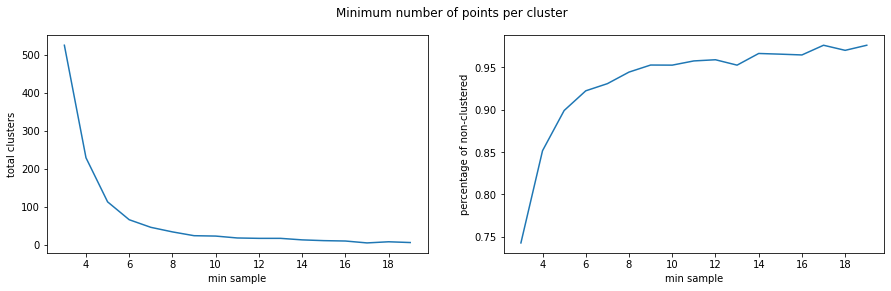

In [57]:
total_clusters_eps, non_clustered_eps = [], []
min_samples_axs = np.arange(10, 25, 1)

for min_samples in min_samples_axs:
    optics = OPTICS(min_samples=min_samples).fit(scaled_data)
    total_clusters_eps.append(len(set(optics.labels_)) - 1)
    non_clustered_eps.append(list(optics.labels_).count(-1) / len(list(optics.labels_)))

fig, axs = plt.subplots(1, 2, figsize=(15, 4))

fig.suptitle("Minimum number of points per cluster")

axs[0].plot(min_samples_axs, total_clusters_eps)
axs[0].set_xlabel("min sample")
axs[0].set_ylabel("total clusters")

axs[1].plot(min_samples_axs, non_clustered_eps)
axs[1].set_xlabel("min sample")
axs[1].set_ylabel("percentage of non-clustered")

plt.show()

In [87]:
suitable_parameters = []

for min_samples in np.arange(2, 30, 1):
    for eps in np.linspace(1, 4.0, 30):
        optics = OPTICS(max_eps=eps, min_samples=min_samples).fit(scaled_data)
        total_clusters = len(set(optics.labels_)) - 1
        non_clustered = list(optics.labels_).count(-1) / len(list(optics.labels_))

        if 5 <= total_clusters <= 7 and non_clustered <= 0.12:
            suitable_parameters.append({ "min_samples": min_samples, "eps": eps, "non-clustered": non_clustered, "clusters": total_clusters })

pd.DataFrame(suitable_parameters)

""


In [14]:
def plot_optics(metric="minkowski"):
    p = 3 if metric == "minkowski" else 2
    suitable = OPTICS(max_eps=2, min_samples=3, metric=metric, cluster_method="dbscan", p=p).fit(scaled_data)
    reduced_data = PCA(n_components=2).fit_transform(scaled_data)

    labels = suitable.labels_
    unique_labels = set(labels)

    print(f"Total clusters: {len(set(suitable.labels_)) - 1}")
    print(f"Clusters list: {unique_labels}")
    print(f"Non-clustered: {list(labels).count(-1) / len(list(labels))}")
    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
    unique_labels.remove(-1)

    unique_labels = list(unique_labels)
    unique_labels.sort(key=lambda k: 1/list(labels).count(k))

    for k, col in zip(unique_labels, colors):
        if k == -1:
            col = [0,0,0,1]

        class_member_mask = labels == k
        xy = reduced_data[class_member_mask]

        plt.plot(
            xy[:, 0],
            xy[:, 1],
            "o",
            markerfacecolor=tuple(col),
            markeredgecolor="k",
            markersize=6
        ),

In [6]:
def plot_reachability(metric="minkowski"):
    p = 3 if metric == "minkowski" else 2
    suitable = OPTICS(max_eps=2, min_samples=3, metric=metric, cluster_method="dbscan", p).fit(scaled_data)

    space = np.arange(len(scaled_data))
    reachability = suitable.reachability_[suitable.ordering_]
    labels = suitable.labels_[suitable.ordering_]
    unique_labels = set(labels)
    unique_labels.remove(-1)

    colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

    for k, col in zip(unique_labels, colors):
        Xk = space[labels==k]
        Rk = reachability[labels==k]
        plt.plot(Xk, Rk, col, alpha=0.7)

    plt.plot(space[labels==-1], reachability[labels==-1], "k.", alpha=0.3)
    # plt.plot(space, np.full_like(space, 2.0, dtype=float), "k-", alpha=0.5)
    # plt.plot(space, np.full_like(space, 0.5, dtype=float), "k-.", alpha=0.5)

    plt.ylabel("Reachability (eps distance)")
    plt.title("Reachability plot")

Total clusters: 6
Clusters list: {0, 1, 2, 3, 4, 5, -1}
Non-clustered: 0.06310792033348772


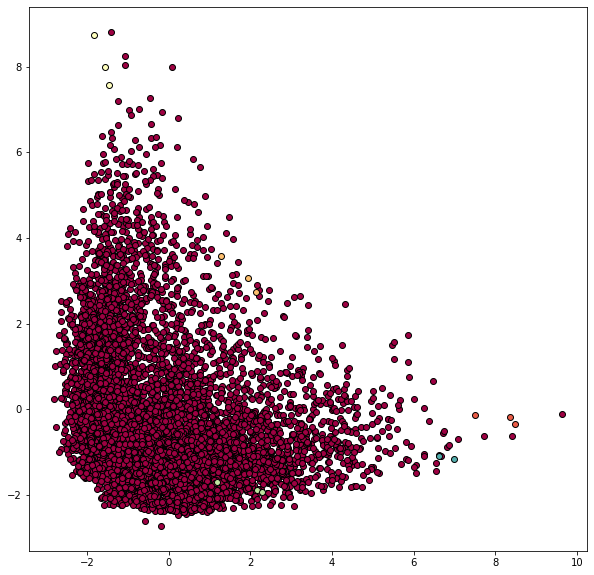

In [15]:
plt.figure(figsize=(10, 10))
plot_optics()
plt.show()

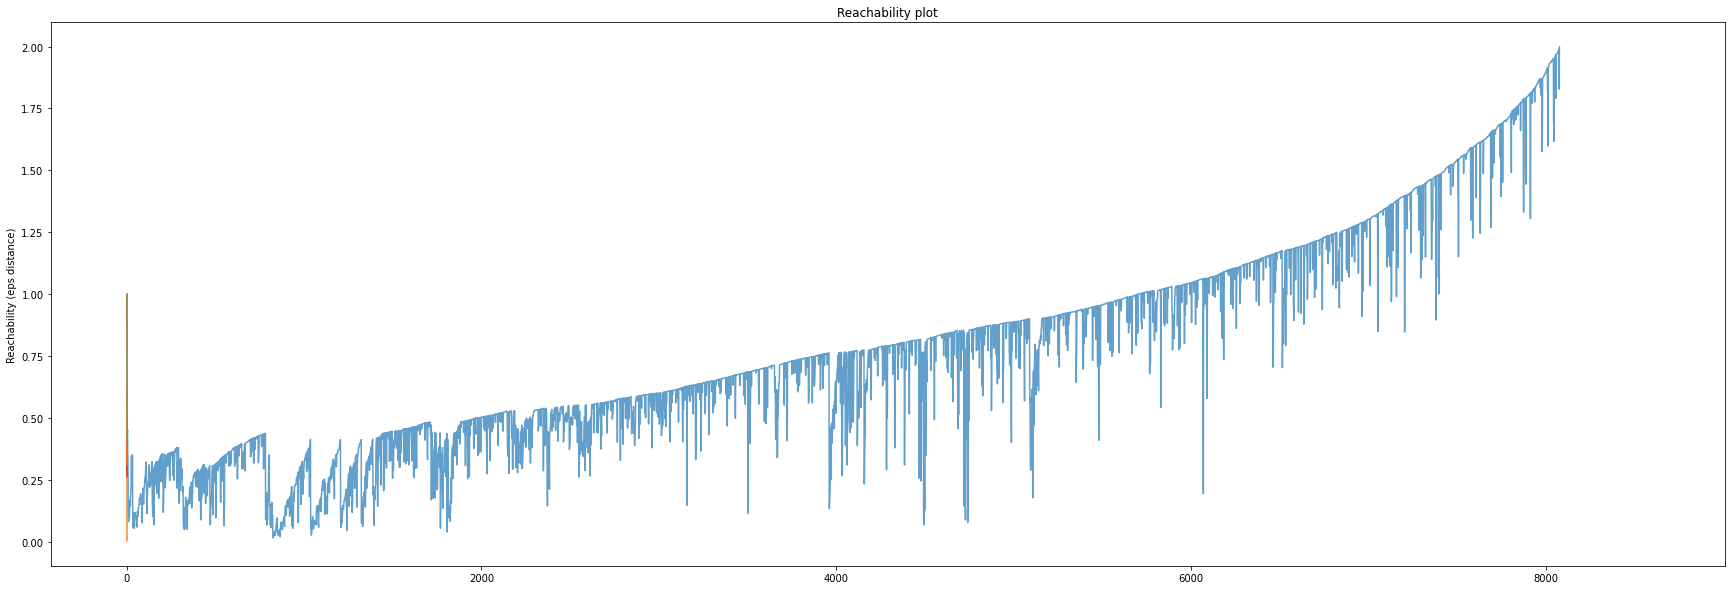

In [7]:
plt.figure(figsize=(30, 10))
plot_reachability()
plt.show()

Total clusters: 6
Clusters list: {0, 1, 2, 3, 4, 5, -1}
Non-clustered: 0.06310792033348772


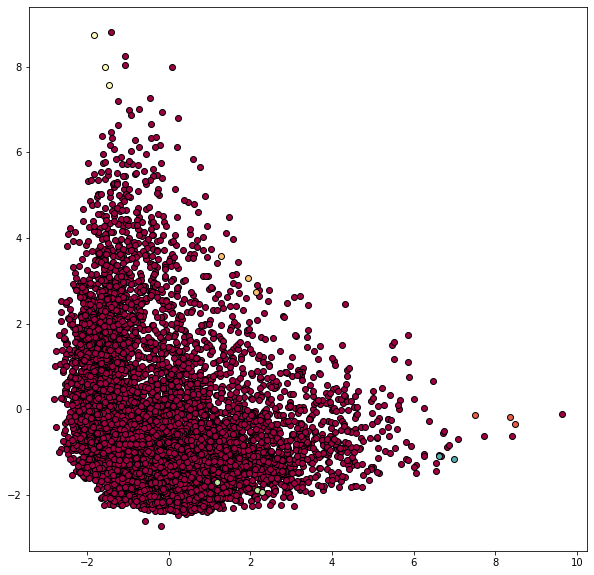

In [19]:
plt.figure(figsize=(10, 10))
plot_optics("euclidean")
plt.show()

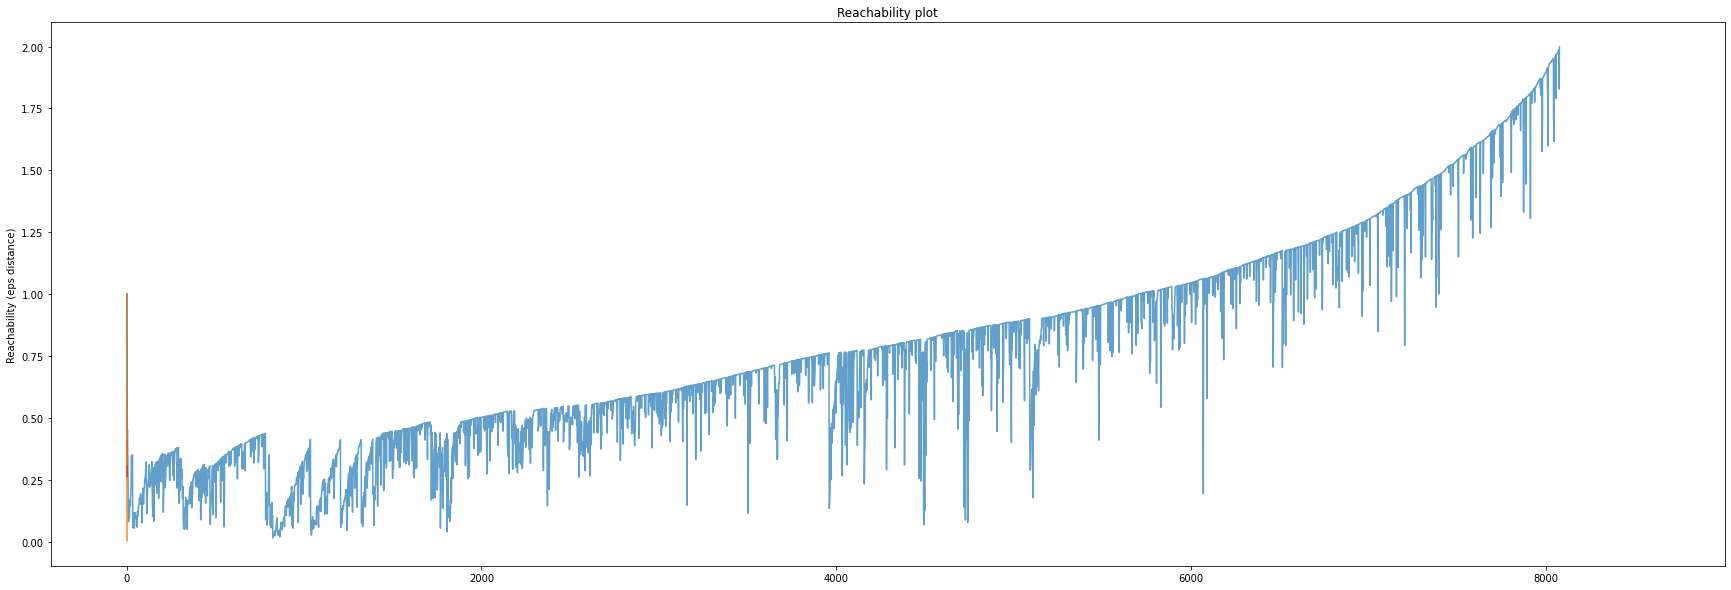

In [38]:
plt.figure(figsize=(30, 10))
plot_reachability("euclidean")
plt.show()

Total clusters: 60
Clusters list: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, -1}
Non-clustered: 0.46410375173691526


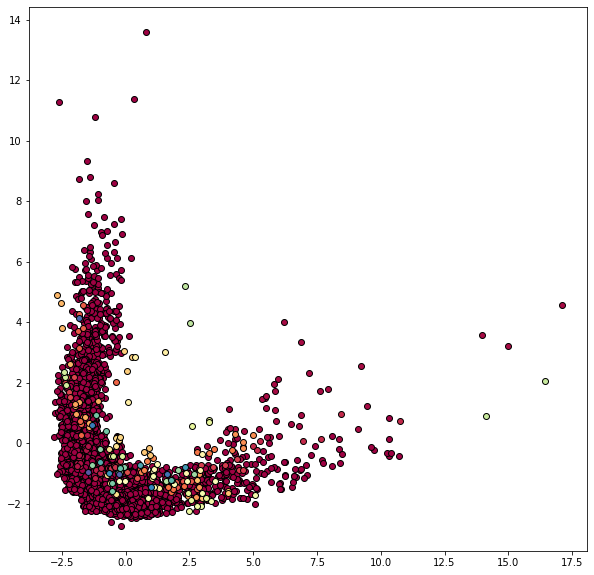

In [22]:
plt.figure(figsize=(10, 10))
plot_optics("canberra")
plt.show()

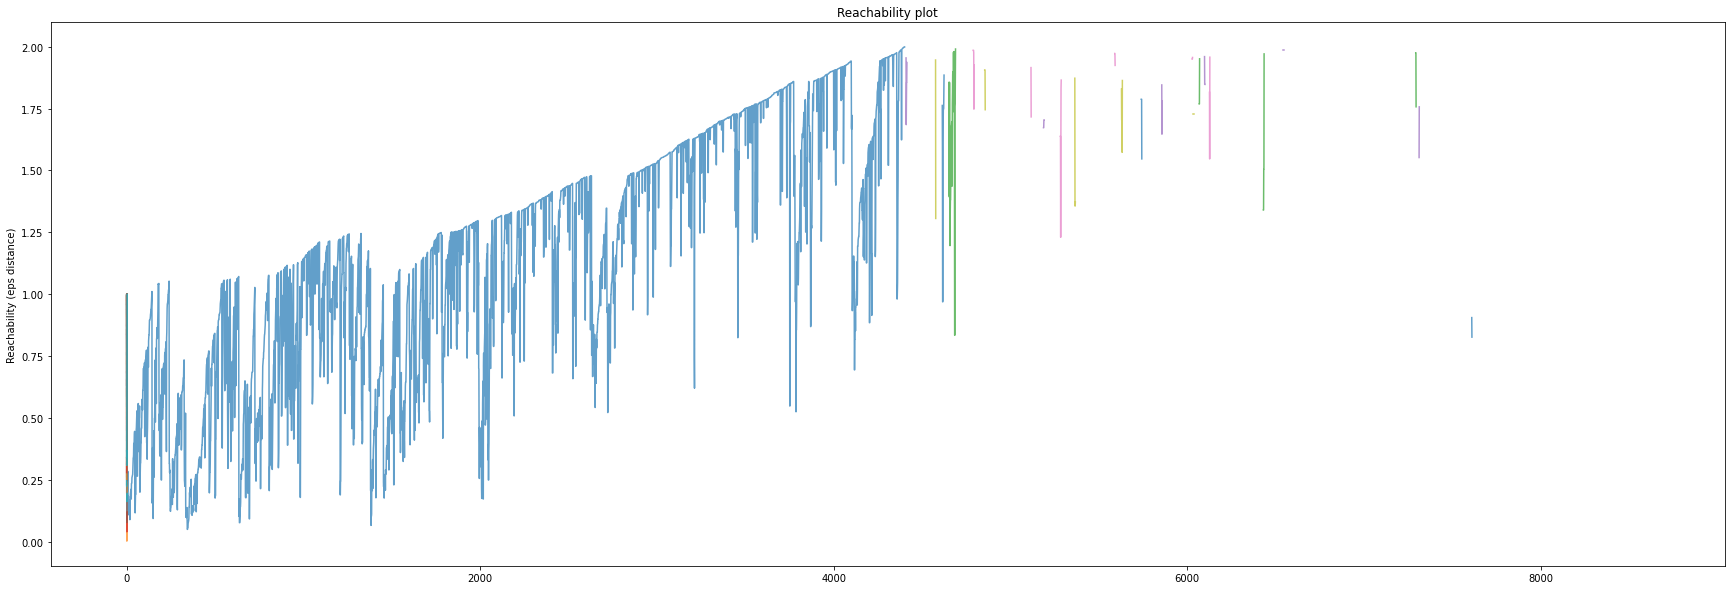

In [39]:
plt.figure(figsize=(30, 10))
plot_reachability("canberra")
plt.show()

Total clusters: 2
Clusters list: {0, 1, -1}
Non-clustered: 0.013316350162112089


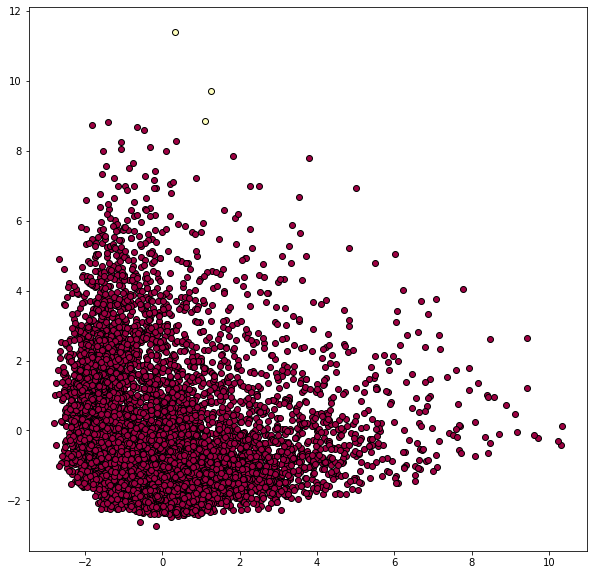

In [24]:
plt.figure(figsize=(10, 10))
plot_optics("chebyshev")
plt.show()

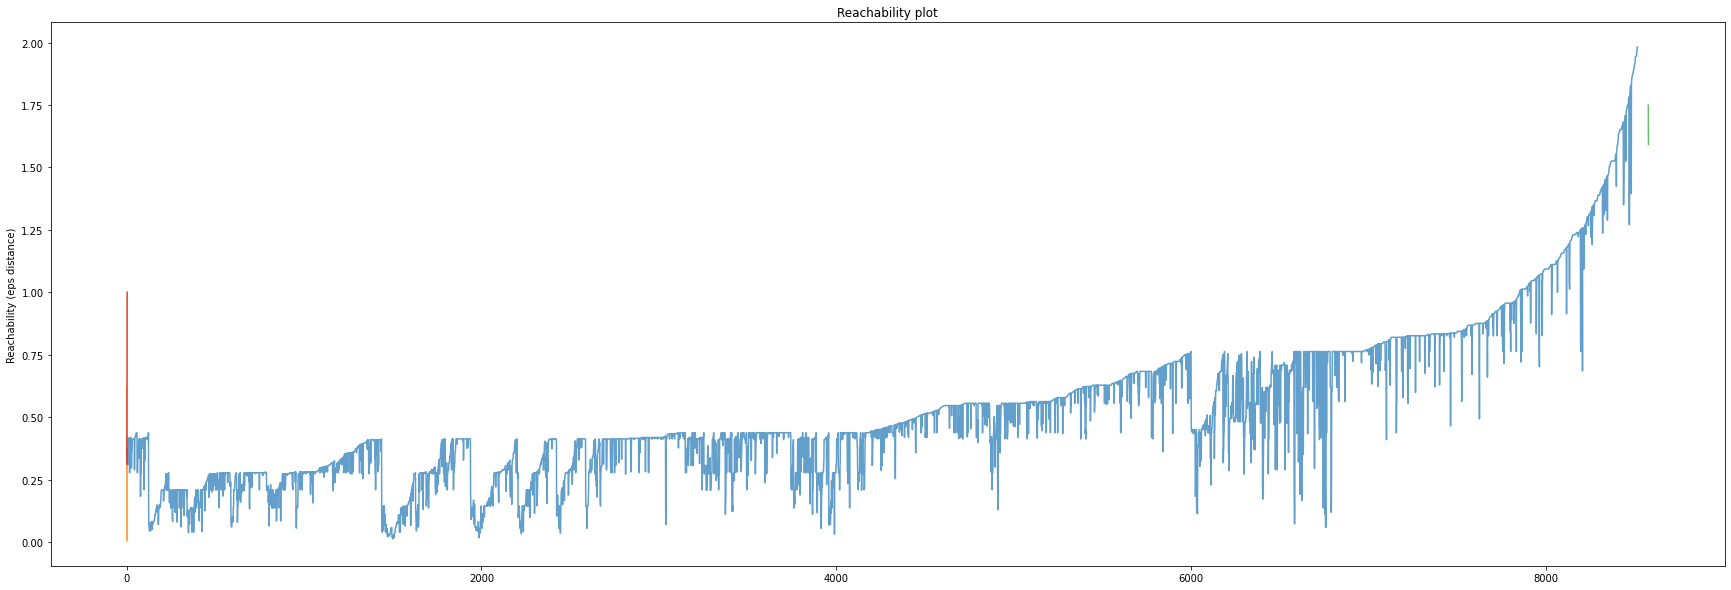

In [40]:
plt.figure(figsize=(30, 10))
plot_reachability("chebyshev")
plt.show()

Total clusters: 55
Clusters list: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, -1}
Non-clustered: 0.3949745252431681


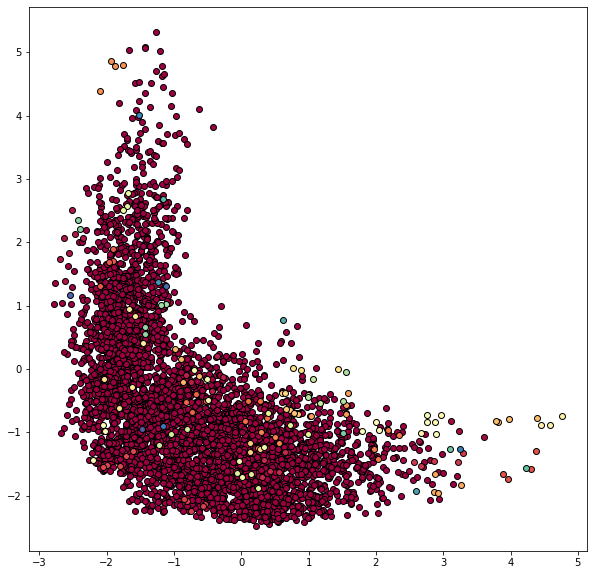

In [26]:
plt.figure(figsize=(10, 10))
plot_optics("manhattan")
plt.show()

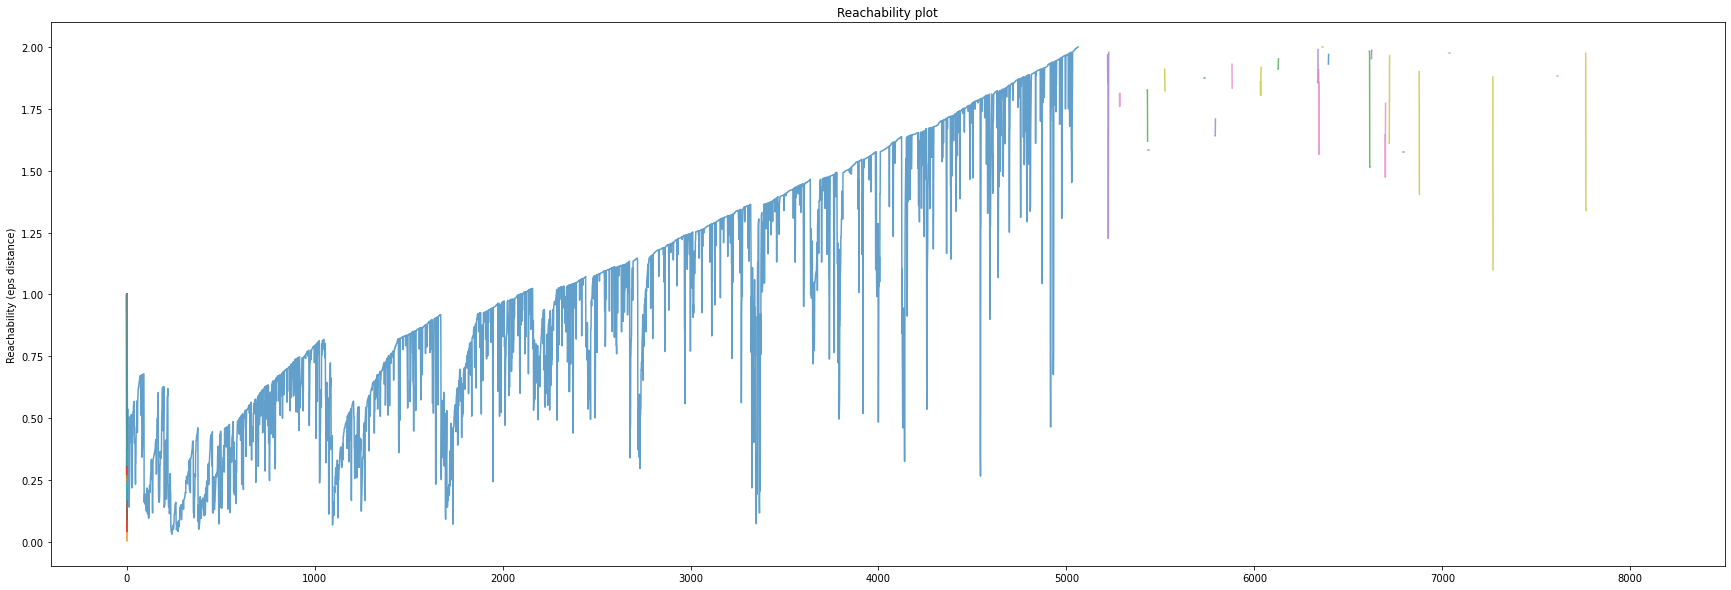

In [41]:
plt.figure(figsize=(30, 10))
plot_reachability("manhattan")
plt.show()

Total clusters: 25
Clusters list: {0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, -1}
Non-clustered: 0.15169059749884206


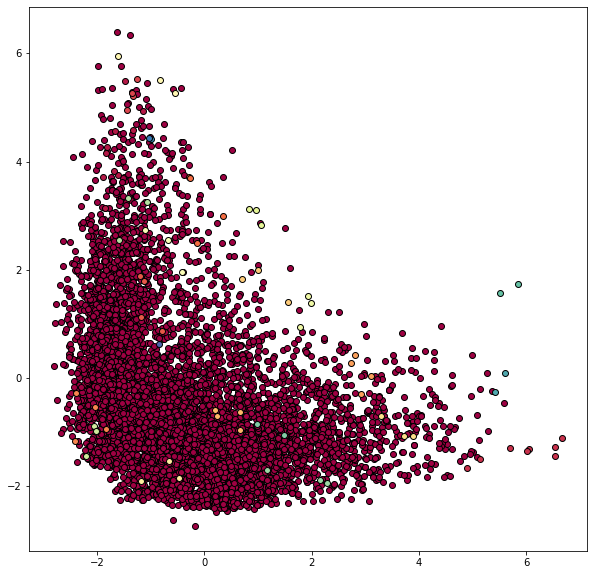

In [28]:
plt.figure(figsize=(10, 10))
plot_optics("sqeuclidean")
plt.show()

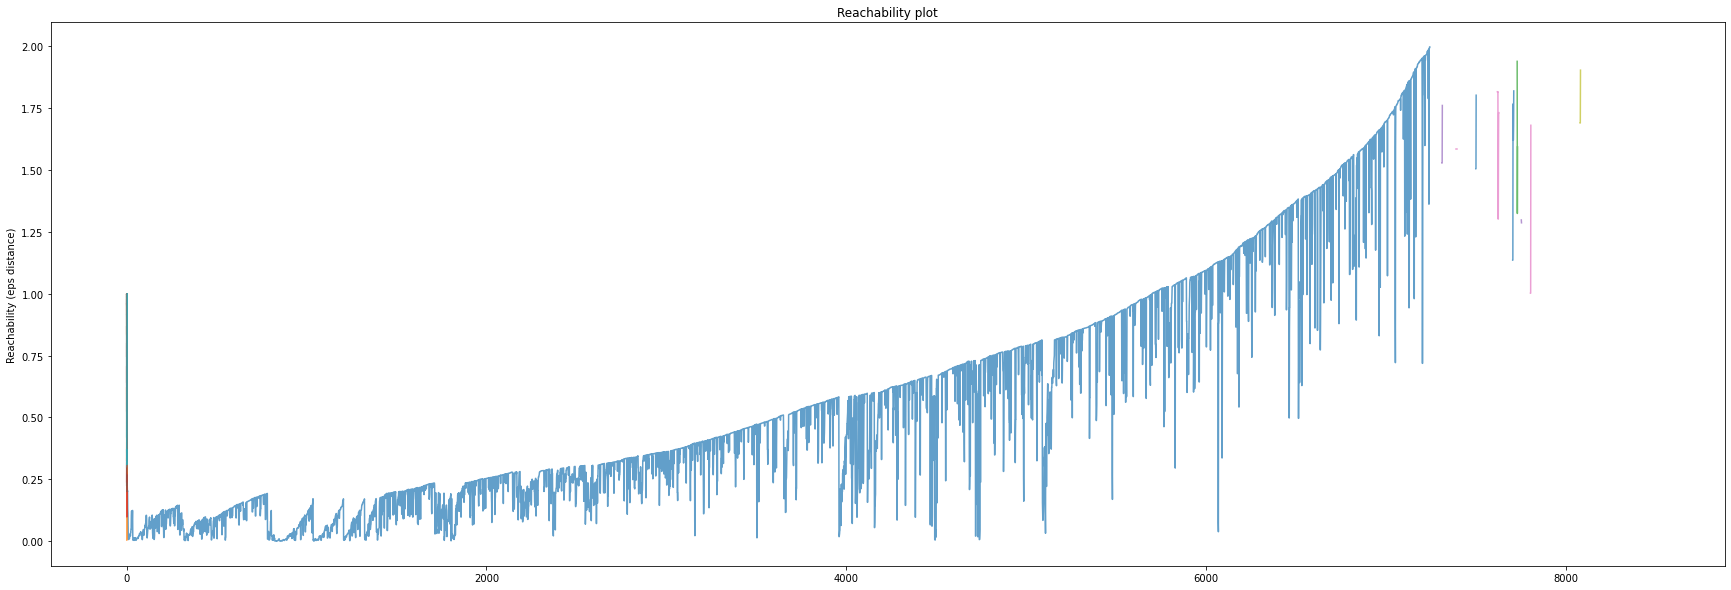

In [42]:
plt.figure(figsize=(30, 10))
plot_reachability("sqeuclidean")
plt.show()